In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import random as rd
# rd.seed=20

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# removing misssing values
def remove_miss(data):

  a=np.array(())
  for i in range(data.shape[1]):
    a=np.append(a,np.where(data.iloc[:,i]==" ?" )[0])
  ind=np.setdiff1d(np.array(range(data.shape[0])),a) # row ids that are from from ?

  # taking that part of data
  data=data.iloc[ind]
  return data


In [31]:
def split_cols(data):
  real=[]
  dis=[]
  for col in data.columns:
    if data[col].dtype=="O":
      dis.append(col)
    else:
      real.append(col)
  return real,dis

In [32]:
data=pd.read_excel("adult.xlsx",header=None)
print(data.columns)
data.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
              "relationship","race","sex","capital-gain",
              "capital-loss","hours-per-week","native-country","income"]
              
data.pop("fnlwgt")
        
print("shape directly after loading ",data.shape)
data=remove_miss(data)
data=data.reset_index(drop=True) # this method adds new index col to the dataframe
y=data.pop("income")


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
shape directly after loading  (32561, 14)


In [33]:
# plotting distributions of Protected variables

import plotly.express as px
cols=["race","age","marital-status","native-country"]
for col in cols:
  values=np.unique(data[col])
  count=[]

  for v in values:
    count.append(np.sum(data[col]==v))
  
  df=pd.DataFrame(list(zip(values,count)),columns=[col,"value"])

  fig=px.bar(df,y="value",x=col,color=col,title=f"TItle: for column {col}",height=400,width=800
             ,labels={
                     "value": "frequency"
                    
                 })
  
  fig.show()



In [34]:
def encode_data(data_c,ohe,dum): # data,instance,fit

  data_c=ohe.transform(data_c).toarray()

  cols_c=np.array(())
  for i in range(len(dum.categories_)):
    cols_c=np.append(cols_c,dum.categories_[i])
  data_c=pd.DataFrame(data_c,columns=cols_c)
  return data_c

# merging dataFrames

def merge_dfs(data_r,data_c):
  ndata= pd.DataFrame()
  for col in data_r.columns:
    ndata[col]=data_r[col]
  for col in data_c.columns:
    ndata[col]=data_c[col]
  return ndata




# romba mukyamana section

In [35]:

r_,c_=split_cols(data)

# data_r=data[r_] ************* taking subcolumns of dataframe
# data_c=data[c_]


# fitting a model
ohe=OneHotEncoder() # handle_unknown='ignore' can be passed
dum=ohe.fit(data[c_])  # *******************************************************************  for a col: it asssumes that no of distinct values= distinct values in that col, but in general we may have extra values also



# merging dataFrames
ndata=merge_dfs(data[r_],encode_data(data[c_],ohe,dum))



C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [36]:
# creating a model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
model=clf.fit(ndata,y)

In [37]:
yh=model.predict(ndata)
np.sum(yh==y)/len(yh)


0.9750348120151183

In [38]:
# testing 
# creating test data


# import test set
tdata=pd.read_excel("adult_test.xlsx",header=None)
print(tdata.shape)
tdata.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
              "relationship","race","sex","capital-gain",
              "capital-loss","hours-per-week","native-country","income"]
tdata.pop("fnlwgt")
        
tdata=tdata.dropna()
tdata=remove_miss(tdata)
tdata=tdata.reset_index(drop=True) # this method adds new index col to the dataframe
ty=tdata.pop("income")

tdata=tdata.dropna()
tdata.reset_index(drop=True)

# one hot encoding


tndata=merge_dfs(tdata[r_],encode_data(tdata[c_],ohe,dum))

        
  

(16282, 15)


C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [39]:
# send a copy of data
def create_test_data(d,var,uni): # pass the unique values also  
    l=[]
    len=uni.shape[0]
    print(uni)
    for i in range(d.shape[0]): # [4,21,32]:
      we=[1]*len
      ele=d[var][i]
      ind=np.where(uni==ele)[0][0]
      we[ind]=0
      
      kum=rd.choices(uni,we)[0]
      # print(ele,we,kum)
      l.append(kum)
    # print(l)
    return l        

In [40]:
import copy
ctdata=copy.deepcopy(tdata)
ctdata["race"]=create_test_data(tdata,"race",np.unique(data.race))

# convert the data

ctndata=merge_dfs(ctdata[r_],encode_data(ctdata[c_],ohe,dum))

 






[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [41]:
# main model predictions

# training data prediction
yht=model.predict(ndata)
# ty=list(map(lambda s: s[0:-1],ty))  # the word ending has dot 
print("train_acuuracy",np.sum(yht==y)/len(yht) )

yht=model.predict(tndata)
ty=list(map(lambda s: s[0:-1],ty))  # the word ending has dot 
print("test accuracy",np.sum(yht==ty)/len(yht)  )    # test accuracy

yht2=model.predict(ctndata)


print("percentage of samples matched",np.sum(yht==yht2)/len(yht))




###############################

train_acuuracy 0.9750348120151183
test accuracy 0.8122841965471448
percentage of samples matched 0.9336653386454183


In [42]:
# creating data using random sample 

col="race"
uni=np.unique(data[col])

di={}
length=[]
for i in uni:
  di[i]=np.where(data[col]==i)[0]
  length.append(len(di[i]))
size=int(0.8*min(length))




In [43]:
def max_of_row(data):
  l=[]
  for i in range(data.shape[0]):
    data.iloc[i,:]

In [44]:
def predict(models,data):
  p=pd.DataFrame()
  for i in range(len(models)):
    p[i]=models[i].predict(data)
  l=[]

  for i in range(p.shape[0]):
    dum=list(p.iloc[i,:])
    l.append(max(dum,key=dum.count))
  return np.array(l)


  


In [50]:
rounds=30
match=[]
max_match=[]
models=[]
for j in range(rounds):
  ind=[]
  for i in di.values():
    ind+=(rd.sample(list(i),size))

  rdata=data.iloc[ind,:]
  rdata=rdata.reset_index(drop=True)

  # encode the data
  rndata=merge_dfs(rdata[r_],encode_data(rdata[c_],ohe,dum))
  model_n=clf.fit(rndata,y[ind])
  # add this model to this
  models.append(copy.deepcopy(model_n))

  
  # predicting using this model
  yht=model_n.predict(tndata)
  yhtc=model_n.predict(ctndata)
  match.append(np.sum(yht==yhtc)/len(yht))

  # predict using max mode
  yht=predict(models,tndata)
  yhtc=predict(models,ctndata)
  max_match.append(np.sum(yht==yhtc)/yht.shape[0])
  





C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\GIRIYA~1\AppData\Local\Temp/ipykernel_17780/2312883604.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a

In [51]:
dab=predict(models,tndata)
dac=predict(models,ctndata)

In [52]:
np.sum(dab==dac)/dab.shape[0]

0.9559760956175298

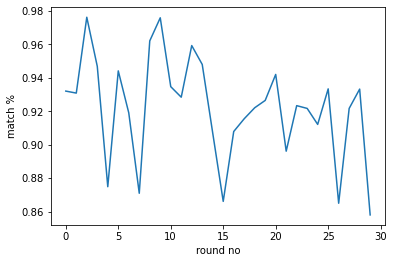

In [53]:

fig=plt.plot(match)
plt.xlabel("round no")
plt.ylabel("match %")
plt.show()

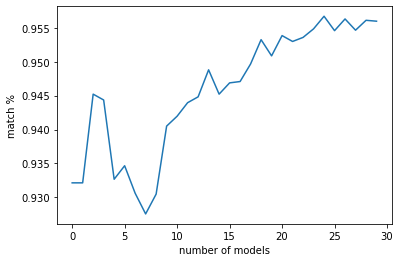

In [54]:
fig=plt.plot(max_match)
plt.xlabel("number of models")
plt.ylabel("match %")
plt.show()